## Setup

### Importing the required libraries



In [1]:
import sys
print(sys.version)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


#### Enable GPU acceleration
Click Edit and select notebook settings to enable GPU

In [0]:
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo
import pdb

import matplotlib.pyplot as plt
import glob
import PIL


In [0]:
device = 'cuda'

In [4]:
print('Pytorch version:', torch.__version__)

Pytorch version: 1.4.0


In [9]:
torch.cuda.get_device_name()

'Tesla P100-PCIE-16GB'

### Mount your google drive into **Files**

To make the training data and other data provided

Instructions for mounting:
1. Run the following cell to mount your personal google drive.
2. Create the folder *My Drive > Deep Learning Project 2* in your google drive.
3. Place the files shared by Dapeng Hu inside this folder. They are *data.zip* and *scene_parsing.zip*.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading of training data

* Load the training data into **root**
* Test display some training images



### Install p7zip and extract training data to **root**

In [12]:
# to show the files inside the folder
!ls "drive/My Drive/Deep Learning Project 2"

data.zip  scene_parsing.zip


In [13]:
# use p7zip to unzip the files, as default unzip program has trouble extracting
!apt install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [14]:
# extract training data folder to root folder
!7z x "drive/My Drive/Deep Learning Project 2/data.zip"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 6676145898 bytes (6367 MiB)

Extracting archive: drive/My Drive/Deep Learning Project 2/data.zip
 41% 4096 Open              --
Path = drive/My Drive/Deep Learning Project 2/data.zip
Type = zip
Physical Size = 6676145898
64-bit = +

  0%      0% 38 - data/data/CItyscapes/test_img/frankfurt_000001_058057_leftImg8bit.png                                                                                 1% 70 - data/data/CItyscapes/test_img/munster_000015_000019_leftImg8bit.png

### Test display GTA image/label pair

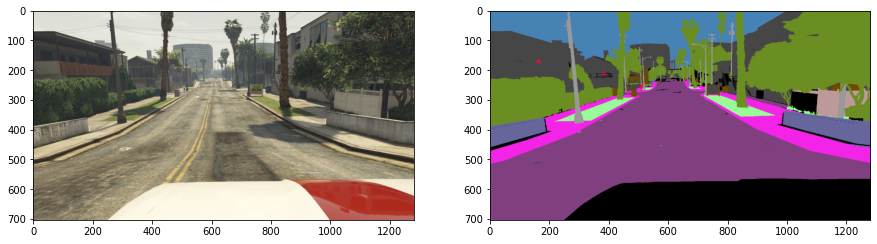

In [15]:
# put the img and label of a selected pair of GTA dataset data side by side

gta_img_filelist = glob.glob("data/data/GTA_V/train_img/*")
gta_label_filelist = glob.glob("data/data/GTA_V/train_label/*")
i = 3
img1 = PIL.Image.open(gta_img_filelist[i])
img2 = PIL.Image.open(gta_label_filelist[i])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

### Transform images into torch tensors

* 